<a href="https://colab.research.google.com/github/dion21001/resolusi_bulan_11/blob/main/detikcom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import normaltest, mannwhitneyu, chi2_contingency

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Membaca Data

In [3]:
data =pd.read_csv("/content/drive/My Drive/colab/detikcom.csv")
data.head()

<ipython-input-3-2265d300112a>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data =pd.read_csv("/content/drive/My Drive/colab/detikcom.csv")


,Page Title,Page,articleid,contenttype,Source / Medium,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users
0,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,google / organic,99099,127793,1.546663,113.012962,93.089694,18666
1,"Video: dr Michael Triangto, Dokter 'Lapangan' ...",m.detik.com/health/read/2018/01/18/124423/3821...,3821182,singlepagenews,banner / apps,66409,110322,1.651700,14.790801,2.804197,59502
2,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,(direct) / (none),64686,79376,1.394323,90.728763,43.394609,25789
3,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,googleapis.com / referral,49821,65072,1.386458,137.591554,23.242243,12374
4,Gempa Keras Guncang Jakarta,news.detik.com/berita/d-3829115/gempa-keras-gu...,3829115,singlepagenews,google / organic,39147,46828,1.370963,145.927336,205.678242,9375


insight
- pada  data diatas kita dapa melihat beberapa keterangan column
 - Page title menerangkan mengenai judul dari halaman yang ada di Page
 - Page adalah URL atau tautan ke halaman web yang terkait dengan artikel
 - articleid adalah semacam key value untuk tiap tiap artikel atau Identifikasi unik untuk artikel
 - contenttype adalah Jenis konten dari halaman web
 - Sumber lalu lintas atau cara pengguna sampai ke halaman web
 - Users adalah Jumlah pengguna yang mengakses halaman web
 - Pages / Session: Rata-rata halaman yang dilihat oleh pengguna dalam satu sesi
 - Avg. Session Duration: Rata-rata durasi sesi pengguna
 - Avg. Time on Page: Rata-rata waktu yang dihabiskan pengguna pada halaman tertentu
 - New Users: Jumlah pengguna baru yang mengakses halaman web
- dari column Page title sampai source/ medium adalah parameter (kecuali articleid) yang akan mempengaruhi dari besar kecilnya column dari users hingga column new users

In [4]:
display(data.describe(),data.describe(include=['object']))

,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users
count,689705.000000,689705.000000,689705.000000,689705.000000,689705.000000,689705.000000
mean,17.020046,19.384419,2.561618,81.201285,70.187414,1.006865
std,286.297745,353.911081,23.994712,485.171659,174.870070,93.482334
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.400000,0.000000
75%,3.000000,4.000000,1.000000,0.000000,59.000000,0.000000
max,99099.000000,127793.000000,3474.000000,61888.000000,2803.000000,59502.000000


,Page Title,Page,articleid,contenttype,Source / Medium
count,689705,689705,689705,689705,689705
unique,152219,284596,173155,29,1849
top,Kerennya Foto Editan Para Master Photoshop,m.detik.com/news/berita/d-3829115/gempa-keras-...,3828507,singlepagenews,google / organic
freq,2223,304,3057,404059,202423


**Insight**

1. Page title yang paling banyak di baca adalah Kerennya Foto Editan Para Master Photoshop
2. Alamat yang paling banyak dikunjungi adalah yang memuat masalah gempa keras yang mengguncang jakarta
3. Jenis contenttype yang paling tinggi adalah siglepagenews
4. source/medium yang paling banyak dipakai dalam mengakses pencarian adalah google/organic, organic disini kita melakukan pencarian pada google pada umumnya
5. sumber Page title yang paling banyak dikunjungi adalah 99099 pengunjung
6. total jumlah halaman yang dilihat oleh semua pengguna selama suatu periode waktu tertentu adalah 127793
7. jumlah pages yang dikunjungi dalam 1 sesion secara bersama sama memiliki maksimal yaitu 3474
8. rata-rata waktu tertinggi yang dihabiskan oleh semua pengguna selama sesi di situs web. Sesi dihitung mulai dari saat pengguna membuka situs web hingga meninggalkannya adalah 61888 ini juga kita bisa identifikasi sebagai nilai yang dapat kita gunakan dalam menghitung jumlah pengunjung karna ini mencakup semua orang
9. rata-rata waktu yang dihabiskan oleh semua pengguna pada halaman tertentu selama kunjungan mereka tertinggi adalah 2803
10. angka user baru tertinggi adalah 59502 ini bisa kita lihat untuk mengidentifikasi parameter yang meningkatkan user baru apakah karna jenis pemberitaanya atau karna parameter lainnya

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689705 entries, 0 to 689704
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Page Title             689705 non-null  object 
 1   Page                   689705 non-null  object 
 2   articleid              689705 non-null  object 
 3   contenttype            689705 non-null  object 
 4   Source / Medium        689705 non-null  object 
 5   Users                  689705 non-null  int64  
 6   Pageviews              689705 non-null  int64  
 7   Pages / Session        689705 non-null  float64
 8   Avg. Session Duration  689705 non-null  float64
 9   Avg. Time on Page      689705 non-null  float64
 10  New Users              689705 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 57.9+ MB


In [6]:
listItem = []
for col in data.columns :

    listItem.append( [col, data[col].nunique() ,"(direct) / (none)" in data[col].unique() ])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique','Unique Sample'],
                     data=listItem)
pd.set_option('max_colwidth', None)
unique_values

<ipython-input-6-ba1200aa5e5e>:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  listItem.append( [col, data[col].nunique() ,"(direct) / (none)" in data[col].unique() ])


,Column Name,Number of Unique,Unique Sample
0,Page Title,152219,False
1,Page,284596,False
2,articleid,173155,False
3,contenttype,29,False
4,Source / Medium,1849,True
5,Users,2324,False
6,Pageviews,2477,False
7,Pages / Session,9896,False
8,Avg. Session Duration,31295,False
9,Avg. Time on Page,50365,False


**Insight**
- Page Title title cukup banyak untuk dilakukan analisa jenis berita apa yang menghasilkan parameter yang besar nilainya mencapai 152219
- Page nya juga cukup banyak mencapai 284596 padahal saya berpikir bagaimana kita mengetahui web yang mana yang paling banyak di kunjungi


In [7]:
len(data[data["Source / Medium"]=="(direct) / (none)"])/len(data)


0.10186384033753561

In [8]:
# Menambahkan kolom baru 'klasifikasi berita' pada posisi indeks 2
data.insert(2, 'klasifikasi_berita', data['Page'].str.split('/').str[1])
# Mendapatkan domain dari URL dan menyimpannya di kolom 'Page'
data['Page'] = data['Page'].str.split('/').str[0]
data["klasifikasi_berita"] =data["klasifikasi_berita"].replace("news","berita")
data["klasifikasi_berita"] =data["klasifikasi_berita"].replace("health","kesehatan")
data.head()

,Page Title,Page,klasifikasi_berita,articleid,contenttype,Source / Medium,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users
0,Gempa Keras Guncang Jakarta,m.detik.com,berita,3829115,singlepagenews,google / organic,99099,127793,1.546663,113.012962,93.089694,18666
1,"Video: dr Michael Triangto, Dokter 'Lapangan' Bagi yang Tak Ingin Sakit",m.detik.com,kesehatan,3821182,singlepagenews,banner / apps,66409,110322,1.651700,14.790801,2.804197,59502
2,Gempa Keras Guncang Jakarta,m.detik.com,berita,3829115,singlepagenews,(direct) / (none),64686,79376,1.394323,90.728763,43.394609,25789
3,Gempa Keras Guncang Jakarta,m.detik.com,berita,3829115,singlepagenews,googleapis.com / referral,49821,65072,1.386458,137.591554,23.242243,12374
4,Gempa Keras Guncang Jakarta,news.detik.com,berita,3829115,singlepagenews,google / organic,39147,46828,1.370963,145.927336,205.678242,9375


In [9]:
data.duplicated().sum()

20034

In [10]:
data =data.drop_duplicates()

**Insight**
- Karna domain Url Page yang begitu banyak saya hanya mengambil domain utama utama saja seperti **m.detik.com**
- Begitu juga dengan Page title yang beragam saya sangat kesulitan dalam mengklasifikasikan jenis beritanya maka dari itu dari column saya mengambil klasifikasi teksnya contohnya **news**

## Memeriksa Missing Value

In [11]:
data.isnull().sum()

Page Title               0
Page                     0
klasifikasi_berita       0
articleid                0
contenttype              0
Source / Medium          0
Users                    0
Pageviews                0
Pages / Session          0
Avg. Session Duration    0
Avg. Time on Page        0
New Users                0
dtype: int64

**Insight**
- Tidak ada missing value pada data diatas
- Tetapi jika kita mengamati ada data yang berisi direct/none pada column source/Medium

## Visualisasi Korelasi Pada Dataset

In [12]:
numerical_features = data.describe().columns

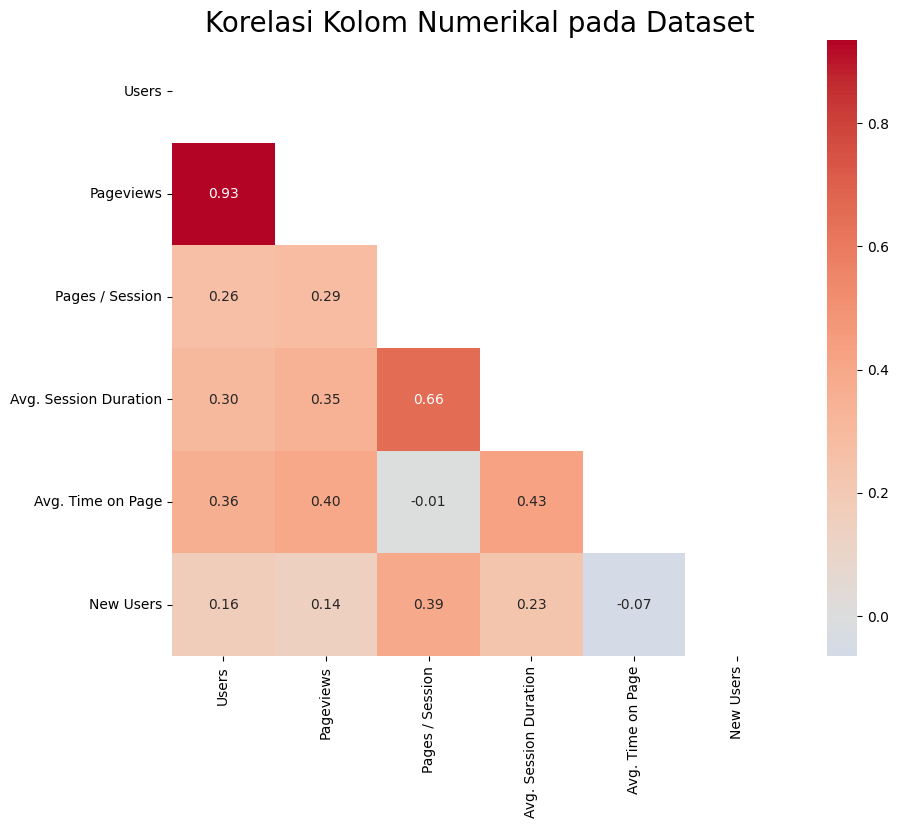

In [13]:
plt.figure(figsize=(10,8))

matrix = np.triu(data[numerical_features].corr(method='spearman'))

sns.heatmap(data=data[numerical_features].corr(method='spearman'), annot=True, fmt='.2f', cmap='coolwarm', center=0, mask = matrix, square='True')
plt.title('Korelasi Kolom Numerikal pada Dataset',size=20)
plt.show()

**Insight**
- kita bisa melihat bahwa korelasi paling besar tercipta antara user dan pagevies kita memang betul semakin banyaak user yang mengunjungi sebuah web maka pagevies semakin besar
- ada beberapa **korelasi** yang bernilai negati berarti contohnya AVg.session Duration terhadap New user berarti untuk meningkatkan new user kita dapat mengurangi Avg.time On page artinya bisa dengan mengurangi page dengan meningkatkan inti inti berita saja pada web
- pada users dan pageviews memiliki korelasi yang positif terhadap New Users tetapi nilainya cukup kecil diantara **0.15-0.20** yang artinya kunjungan user lama dan banyaknya page itu di baca tidak terlalu mempengaruhi kepada penambahan user baru memang betul untuk meningkatkan new user harus memuat berita yang menarik agar user yang lama dapat berbagi kepada user melalui sharing media
- pada Avg. session Duration dan Pages/session juga memiliki korelasi positif dengan new user tetapi juga tidak terlalu kuat walaupun lebih kuat dari pada User dan pageviews Terhadap New Users, artinya untuk meningkatkan New Users kita dapat meningkatkan AVg.session Duration dengan cara mungkin menyederhanakan page sehingga pembaca lebih mudah dalam memahami isi dari page tersebut ,kemudahan ini mungkin yang akan akan membuat user lama mensharing page tersebut ke orang lain




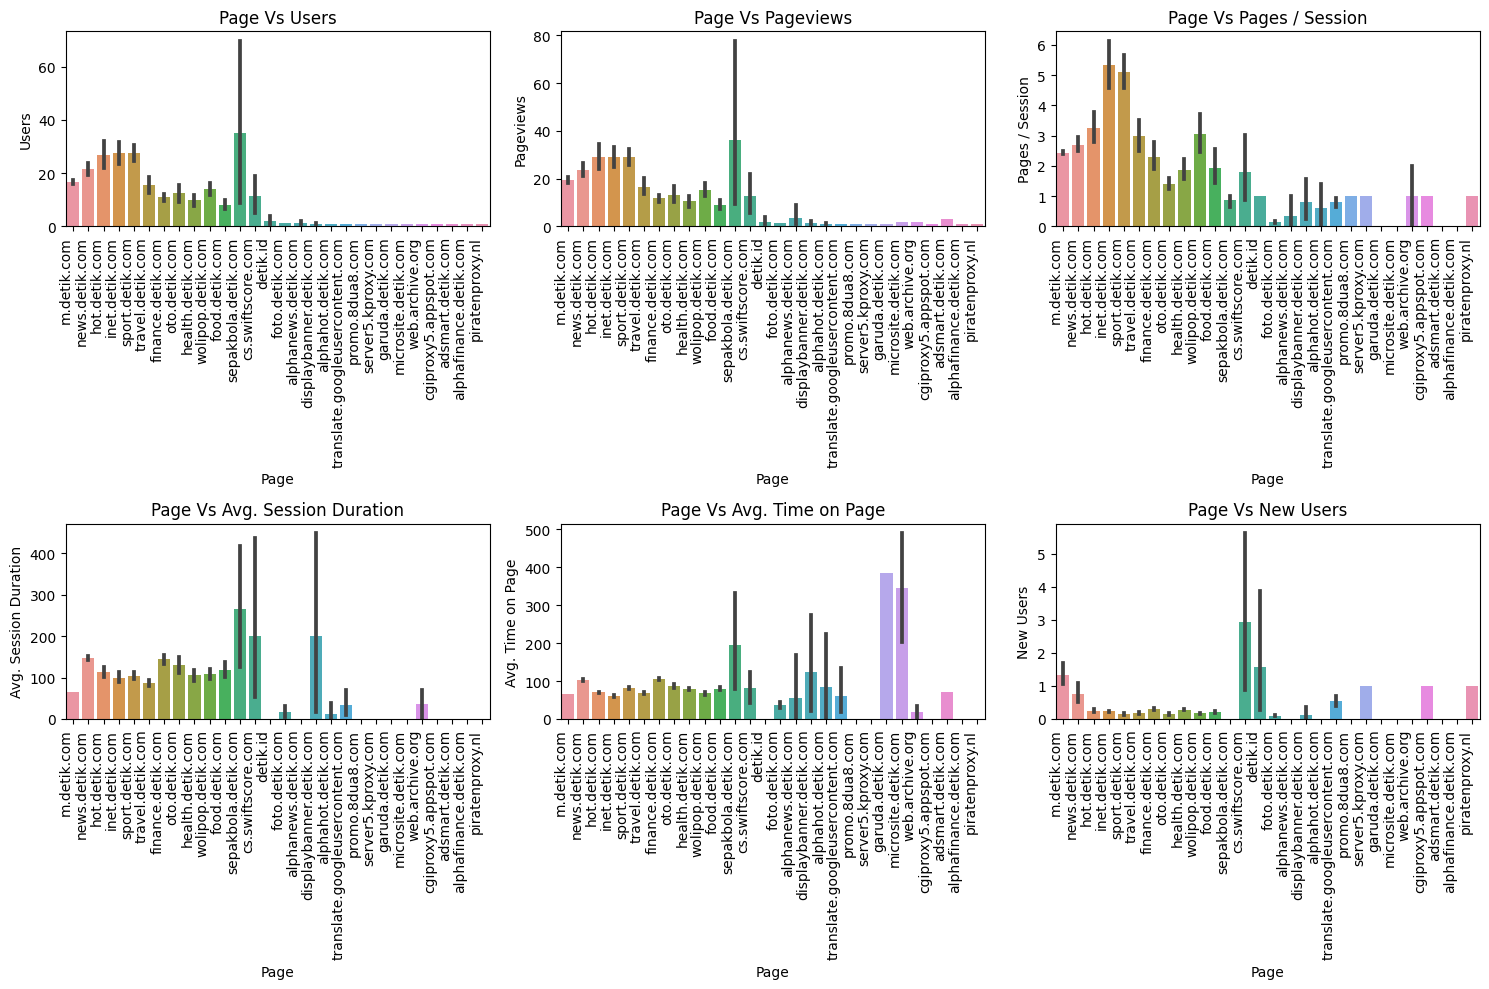

In [14]:
# Membuat subplot 2 x 3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# List dari sumbu y
y_values = [
    data["Users"],
    data["Pageviews"],
    data["Pages / Session"],
    data["Avg. Session Duration"],
    data["Avg. Time on Page"],
    data["New Users"]
]

# Plotting pada setiap axes
for i, ax in enumerate(axs.flat):
    sns.barplot(x=data['Page'], y=y_values[i], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
    ax.set_title(f'Page Vs {y_values[i].name}')


# Ratakan layout
plt.tight_layout()

# Menampilkan plot
plt.show()


**Insight**
- web yang paling banyak dikunjungi oleh user adalah **sepakbola.detik.com** dengan rata rata kunjungan persesion adalah **30-40** Kunjungan ,mungkin ini karna pada saat data ini dibuat pemberitaan mengenai bola sedang naik naiknya,selain itu kita mengetahui bahwa olahraga sepakbola adalah olahraga yang paling banyak di gemari masyarakat indonesia
- pada pageviews juga pemberitaan mengenai sepakbola juga mendominasi hal ini karna kunjugan yang banyak
- pada **Page/session** pemberitaan yang bersumber dari **sport.detik.com** memiliki nilai yang tertinggi yang artinya web ini dibaca paling banyak tiap session nya artinya ada beberapa hal yang bisa kita pertimbangkan kenapa ini terjadi jika melihat dari data **Avg. Time on Page** ternyata **sport.detik.com** itu tidak terlalu tinggi artinya **user** yang mengunjungi web tersebut hanya melihat sekilas saja page tersebut , untuk itu saya beranggapan hal yang dapat kita lakukan untuk meningkatkan lama waktu pembukaan web adalah
  - Buatlah halaman web Anda dengan struktur yang jelas dan navigasi yang mudah
  - Integrasi elemen multimedia seperti gambar, video, atau grafik dapat membuat halaman lebih menarik dan meningkatkan retensi pengunjung
  - menggunakan CTA yang menarik untuk mendorong pengunjung untuk melakukan tindakan selanjutnya, seperti membaca artikel terkait, berlangganan, atau berbagi konten.
  - Pastikan bahwa halaman web Anda memuat dengan cepat. Pengunjung cenderung meninggalkan halaman jika memuat terlalu lama
  - kita bisa menggunakan **garuda.detik.com** sebagai web rujukan untuk membandingkan karna web ini memiliki **Avg. Time on Page** tertinggi tetapi sekali lagi parameter yang lain hary dipertimbangkan mungkin karna jaringan sehingga pindah ke page berikutnya sulit
- pada **new user** ternyata web **cs.swiftscore.com** adalah yang tertinggi sebuah web yang menyediakan Skor Langsung, Klasemen, Jadwal Pertandingan, Tabel, Gol, Berita Sepak Bola, dan semua jenis olahraga yang berfokus terutama pada sepak bola. Dari sini kita dapat melihat pengunjung baru akan terus bertambah jika dia berhubungan dengan olahraga , tetapi melihat dari **Avg. Time on Page** dan **Avg. Time on Page** tidak terlalu tinggi pada web ini artinya saya menyarankan untuk detik.com membuat situs yang yang sama dengan **cs.swiftscore.com**  tetapi dengan **Page** yang lebih menarik agar waktu pengunjung ke web tersebut lebih tinggi

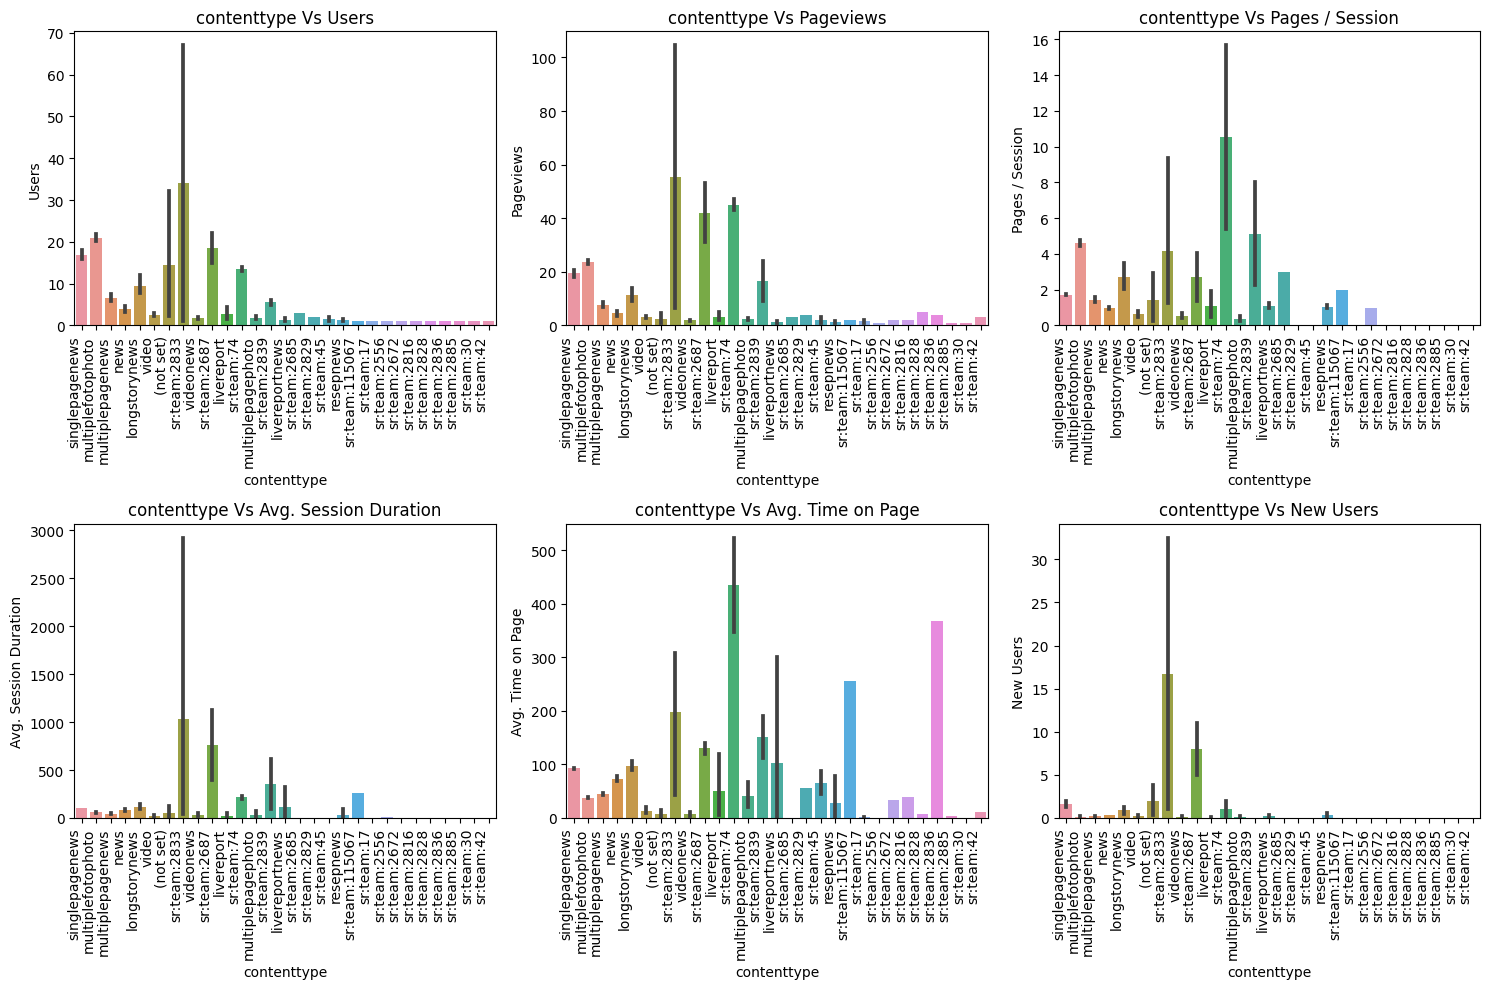

In [15]:
# Membuat subplot 2 x 3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# List dari sumbu y
y_values = [
    data["Users"],
    data["Pageviews"],
    data["Pages / Session"],
    data["Avg. Session Duration"],
    data["Avg. Time on Page"],
    data["New Users"]
]

# Plotting pada setiap axes
for i, ax in enumerate(axs.flat):
    sorted_data = data.sort_values(by=y_values[i].name, ascending=False)
    sns.barplot(x=data['contenttype'], y=y_values[i],data=sorted_data, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
    ax.set_title(f'contenttype Vs {y_values[i].name}')


# Ratakan layout
plt.tight_layout()

# Menampilkan plot
plt.show()


**insight**
- data diatas menunjukkan jenis contenttype terhadap rata-rata parameter lain, contohnya contenttype yang mana yang rata-rata user kunjungi terbanyak dan lainnya
- pada kunjungan **users**,Pagevies, dan New Users kita dapat melihat bahwa **contenttype** sr:team:2833 menjadi contenttype yang paling banyak dikunjungi ada beberapa hal yang dapat kita  beri narasi awal karna kurangnya pengetahuan saya mengenai jenis contettype ini, mengetahui bagaimana sr:team:26833 bekerja mungkin bisa dijadikan acuan untuk contenttype lain
- sedangkan Page/session dan Avg.Time on Page , contenttype sr:team:74 menjadi yang tertinggi ,ada beberapa asumsi positif yang bisa kita katakan dari sini diantaranya kontentnya mungkin cukup menarik atau relevan,dengan kualitas yang tinggi atau mungkin cara pembawaan contenttype nya menarik hal ini bisa dijadikan acuan bagi contenttype lain , terutama contenttype sr:team:2833 yang memiliki users terbanyak ini akan mengoptimalkan nilai dari web tersebut

**Insight**
-

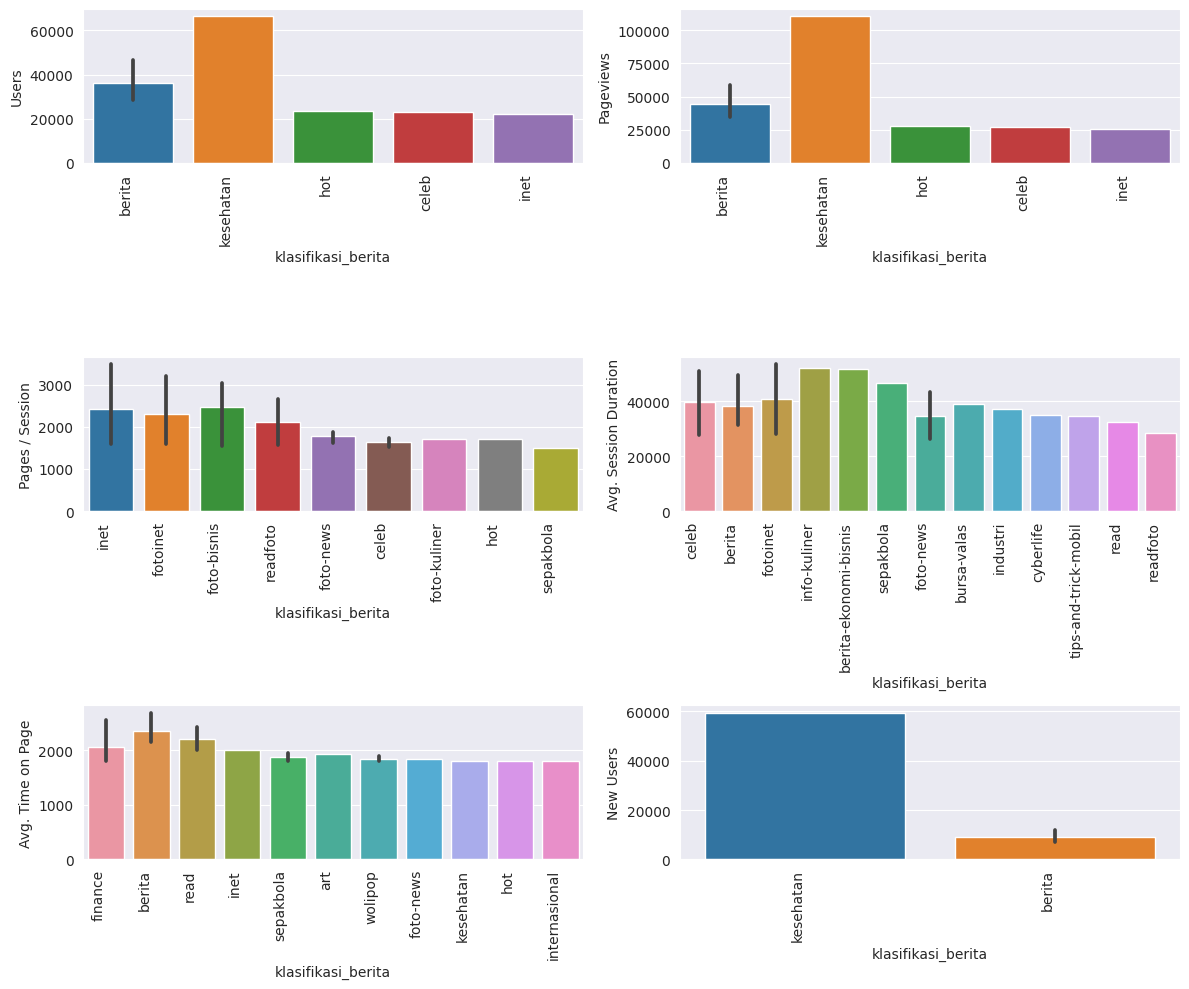

In [16]:
data['klasifikasi_berita'] = data['klasifikasi_berita'].replace("news","berita")
data['klasifikasi_berita'] = data['klasifikasi_berita'].replace("health","kesehatan")
sns.set_style("darkgrid")
plt.figure(figsize=(12, 10))

# Loop untuk membuat subplot
for index, i in enumerate(data.columns[6:]):
    plt.subplot(3, 2, index + 1)
    df_sorted = data.sort_values(by=i, ascending=False).head(20)
    sns.barplot(x=df_sorted["klasifikasi_berita"], y=df_sorted[i])
    plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

**Insight**

-  data diatas menunjukkan bagaimana 20 data klasifikasi yang paling  banyak penggunaannya berdasarkan **klasifikasi_berita**
- pada **User** terhadap **klasifikasi_berita** kita dapat melihat bahwa ternyata pemberitaan mengenai kesehatan adalah pemberitaan paling banyak yang dikunjungi users hal ini mungkin karna pentingnya kesehatan menjadi penunjung masyarakat mengunjungi berita yang berhubungan dengan kesehatan
- pada pemberitaan mengenai **teknologi(inet)** ternyata memiliki nilai yang kurang memuaskan padahal pemberitaan ini bisa menjadi andalan dimana era teknologi sekarang ,pada plotting **Page/session** ternyata nilai **inet** ini cukup tinggi artinya user banyak membaca page nya per session dan waktu **Avg.Time on Page** cukup besar juga , hal ini cukup berlawanan dengan rentahnya user pada **inet** saya menduga hal ini karena pemberitaan teknologi hanya dinikmati oleh orang orang yang mencintai teknologi sedangkan yang tidak menyukai mungkin tidak tertarik mengenai page ini, tetapi melihat tren positifnya pada bagian **Page/session** dan **Avg.Time on Page** berarti web ini cukup menarik tinggal mengikuti perubahan zaman saja hingga perkembangan teknologi menjadi penting
- Penambahan **New_user** pada 20 data teratas didominasi oleh pengaruh pemberitaan topik mengenai **Kesehatan** dan **berita** berarti ini adalah peluang besar dimana ternyata penaikan **new_user** bisa kita optimalkan dengan pemberitaan lain bukan dari kedua topik pemberitaan tersebut

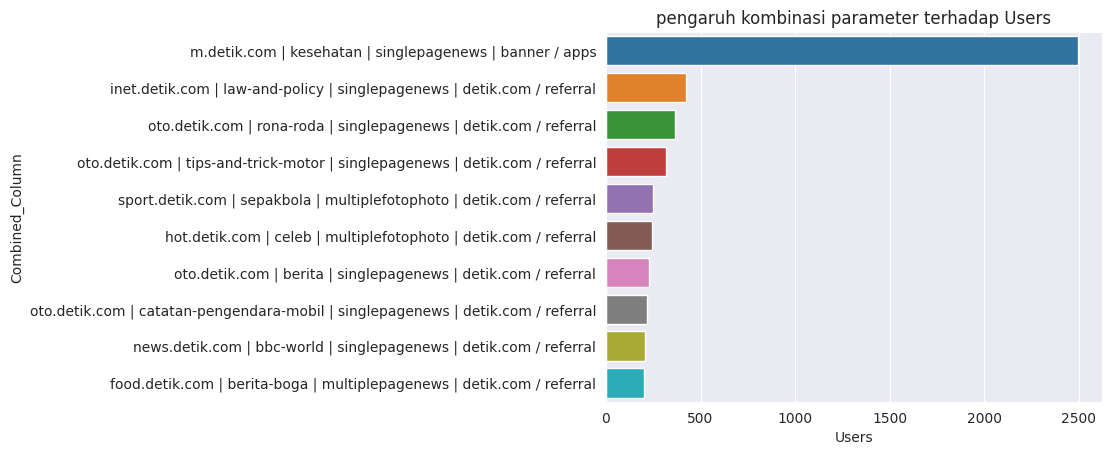

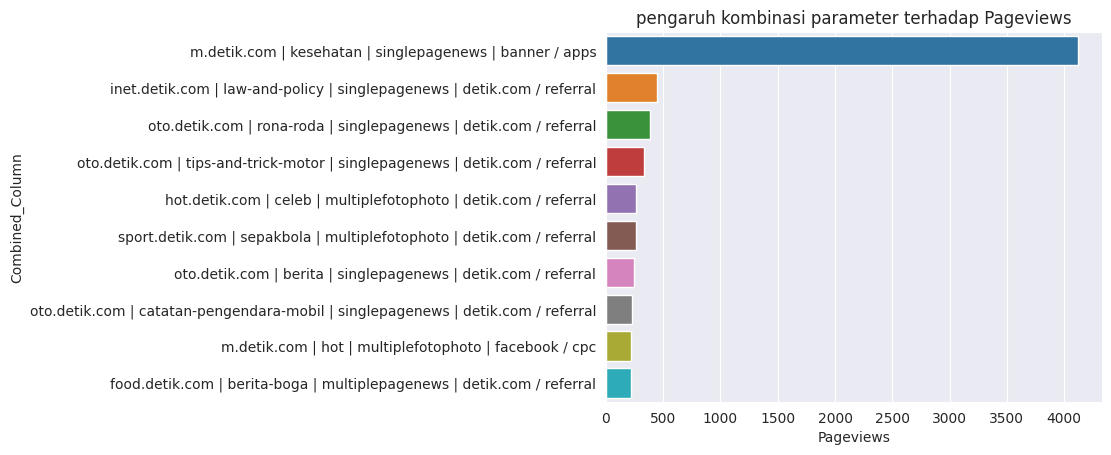

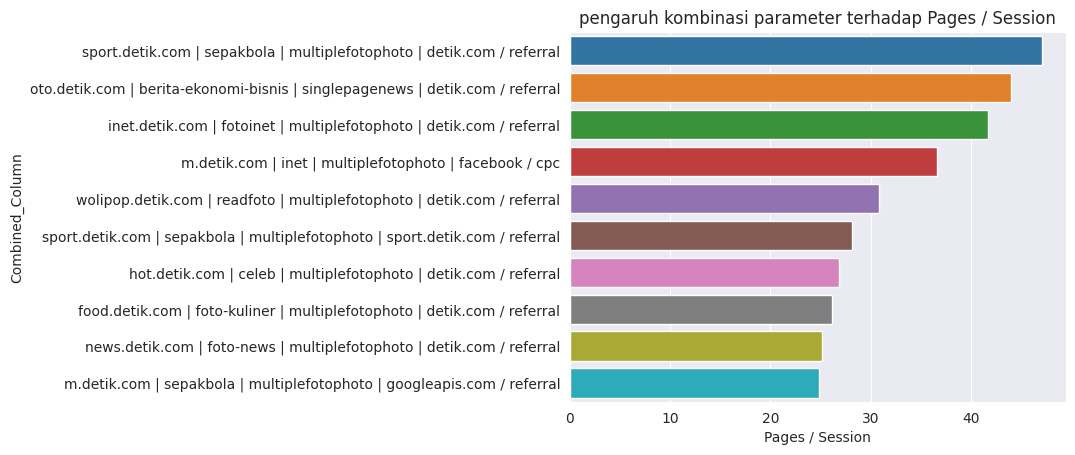

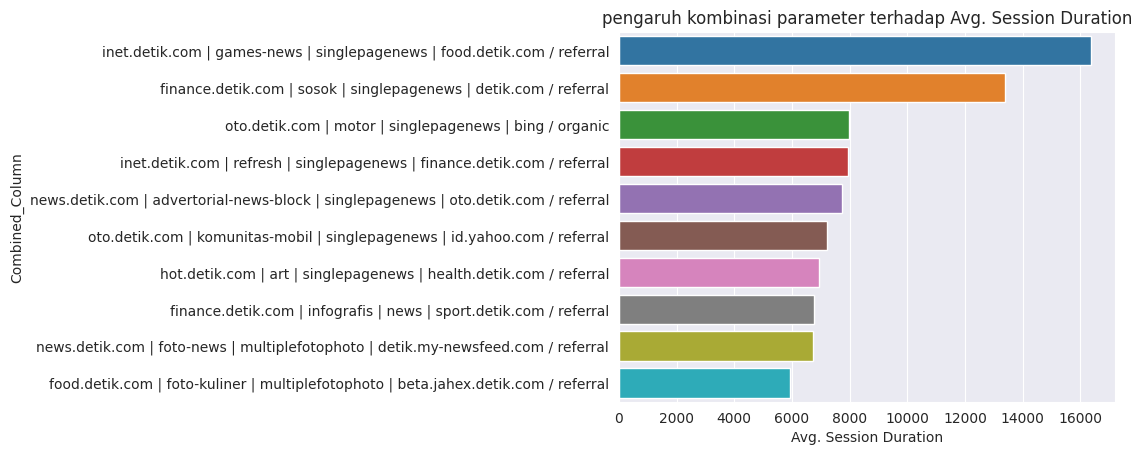

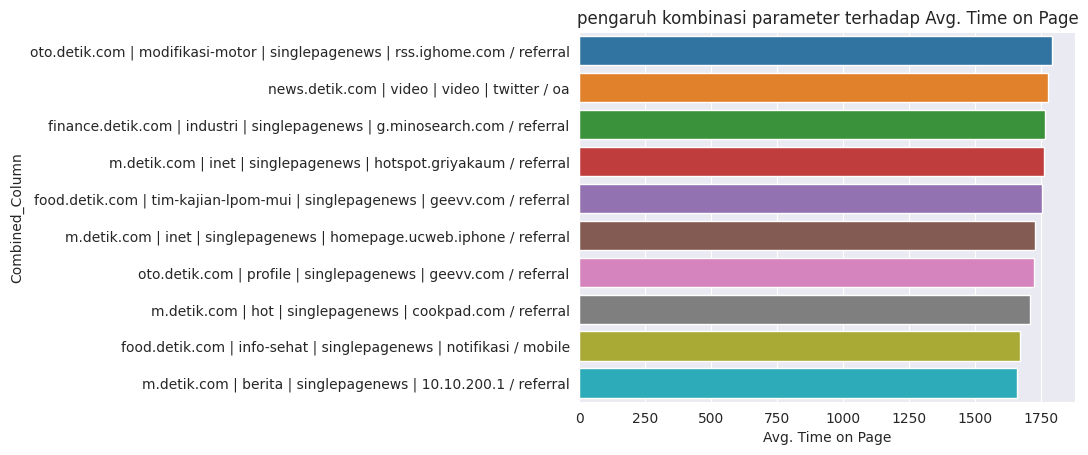

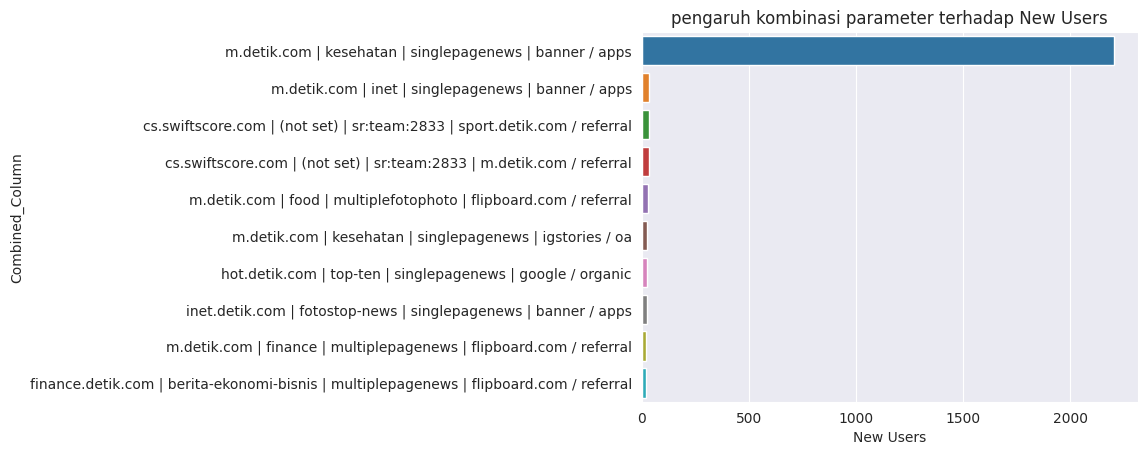

In [20]:
for i in data.columns[6:]:
  grouped_df = data.groupby(['Page', 'klasifikasi_berita', 'contenttype', 'Source / Medium'])[i].mean().reset_index().sort_values(by=i, ascending=False)
  grouped_df['Combined_Column'] = grouped_df['Page'] + ' | ' + grouped_df['klasifikasi_berita'] + ' | ' + grouped_df['contenttype'] + ' | ' + grouped_df['Source / Medium']
  plt.title(f'pengaruh kombinasi parameter terhadap {i}')
  sns.barplot(data =grouped_df.head(10),x =i,y ="Combined_Column")
  plt.show()


**Insight**
- Parameter

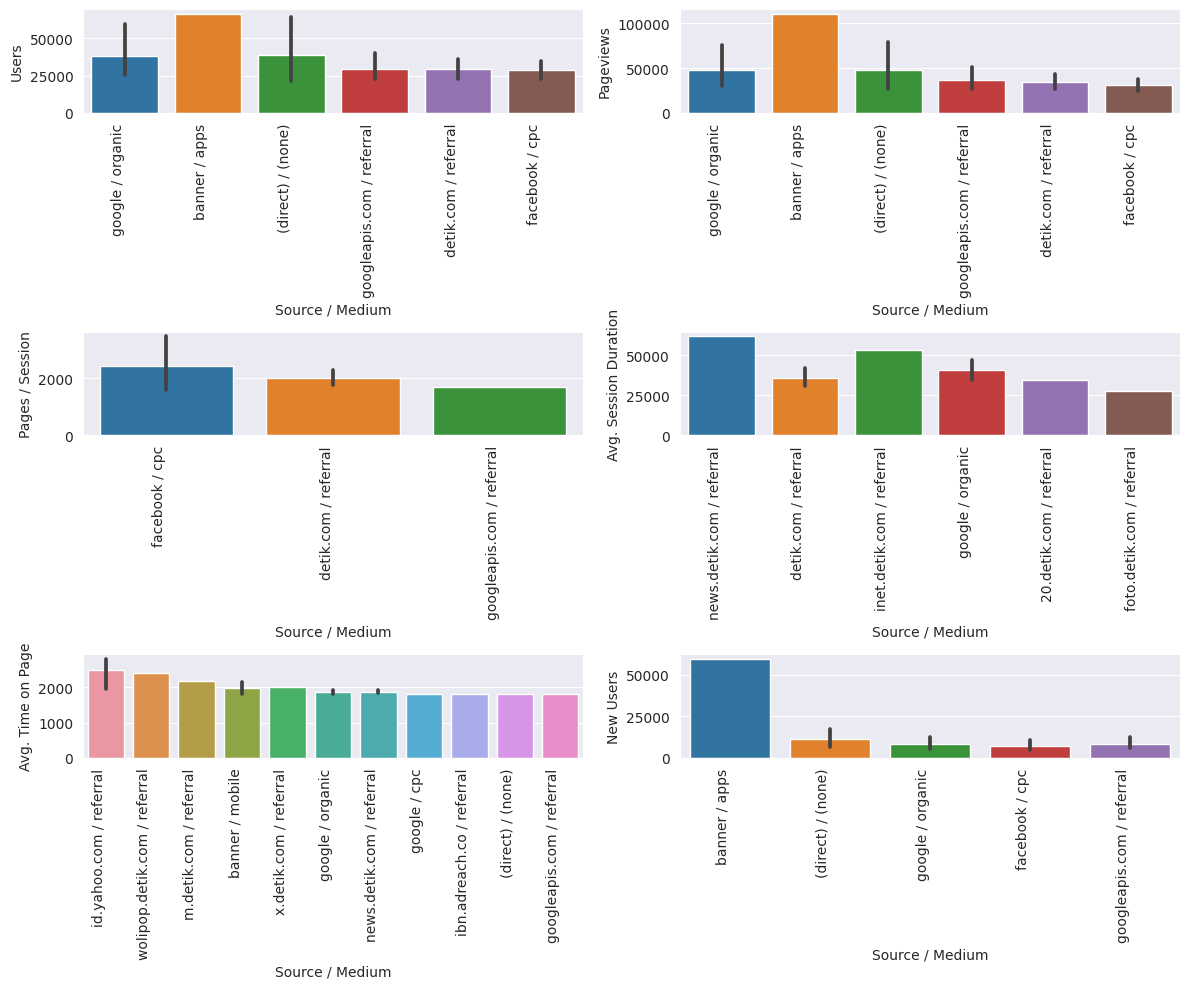

In [18]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 10))

# Loop untuk membuat subplot
for index, i in enumerate(data.columns[6:]):
    plt.subplot(3, 2, index + 1)
    df_sorted = data.sort_values(by=i, ascending=False).head(20)
    sns.barplot(x=df_sorted["Source / Medium"], y=df_sorted[i])
    plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

**Insight**
-